In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=c2fbe6b94d4d54f9edeba950d91e87877697a245f8509914f0c27b9125378c71
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=5ce140a1514c9cbf2fc4daf3d8d9f7e2322bde9deaa7c5c540ddcbb4f26dfa9b
  S

In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Authentication
consumerKey = "iFAGkUSsqbx9sSlz8ZoBUSpLN"
consumerSecret = "cHTd1IQFVMN15eiwatXLA9w6Dz0UxunJTRtZJAJ0hcKiED0IXI"
accessToken = "1191645978727550976-VrQUZgIlOW6oblKC5nNDJ3vGdnu7ew"
accessTokenSecret = "Wsu0Atb4Bi3aiOrADHpfjNGahdShZM88iGyGGTPWTis3I"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: lockdown2 london
Please enter how many tweets to analyze: 2500


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  1025
negative number:  580
neutral number:  895


In [ ]:
tweet_list

,0
0,RT @Petethestreet1: #loweringsun on #christmas...
1,"RT @LondonEconomic: Protesters, very few of wh..."
2,"RT @LondonEconomic: Protesters, very few of wh..."
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...
4,God love 'em - @SlowRichies opened the doors o...
...,...
2495,RT @lucywonder14: @Ldn_Ambulance 68% increase ...
2496,RT @judehaste_write: 💥 #comedy 💥 #contemporary...
2497,RT @judehaste_write: 💥 #comedy 💥 #contemporary...
2498,RT @petsarefound: Please #RT to help #FindLola...


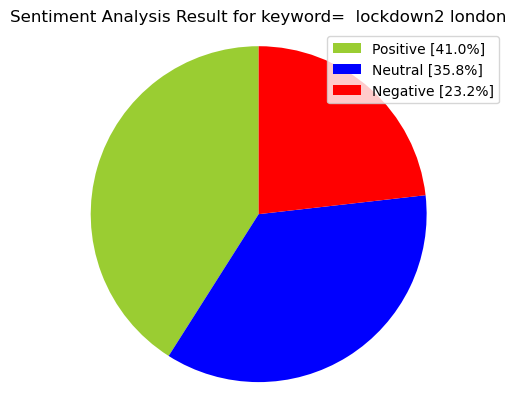

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,RT @Petethestreet1: #loweringsun on #christmas...,RT @Petethestreet1: #loweringsun on #christmas...,0.700000,0.600000,positive,0.000,0.847,0.153,0.4404,121,18
1,"RT @LondonEconomic: Protesters, very few of wh...","RT @LondonEconomic: Protesters, very few of wh...",-0.260000,0.130000,positive,0.079,0.747,0.174,0.5106,121,20
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...,Photo Journal - Day 01\n\n#lockdown2 #lockdown...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,97,11
4,God love 'em - @SlowRichies opened the doors o...,God love 'em - @SlowRichies opened the doors o...,0.375000,0.466667,positive,0.000,0.730,0.270,0.7430,107,19
5,So might wear my #addidas #prideshorts for #lo...,So might wear my #addidas #prideshorts for #lo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,113,12
...,...,...,...,...,...,...,...,...,...,...,...
2461,You are NOT alone ❤\n#WeLoveYouChanyeol \n#Mad...,You are NOT alone ❤\n#WeLoveYouChanyeol \n#Mad...,0.000000,0.000000,positive,0.000,0.838,0.162,0.1877,118,10
2465,"So I live in West Yorkshire, heading into tier...","So I live in West Yorkshire, heading into tier...",0.136364,0.500000,neutral,0.000,1.000,0.000,0.0000,118,26
2467,RT @julian2tweet: Expect to see similar scenes...,RT @julian2tweet: Expect to see similar scenes...,0.000000,0.200000,neutral,0.000,1.000,0.000,0.0000,94,15
2472,RT @petsarefound: Please #RT to help #FindLola...,RT @petsarefound: Please #RT to help #FindLola...,-0.100000,0.108333,positive,0.121,0.604,0.275,0.4215,103,14


In [ ]:
tweet_list

,0
0,RT @Petethestreet1: #loweringsun on #christmas...
1,"RT @LondonEconomic: Protesters, very few of wh..."
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...
4,God love 'em - @SlowRichies opened the doors o...
5,So might wear my #addidas #prideshorts for #lo...
...,...
2461,You are NOT alone ❤\n#WeLoveYouChanyeol \n#Mad...
2465,"So I live in West Yorkshire, heading into tier..."
2467,RT @julian2tweet: Expect to see similar scenes...
2472,RT @petsarefound: Please #RT to help #FindLola...


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Petethestreet1: #loweringsun on #christmas...,loweringsun on christmaslights thestrand ...
1,"RT @LondonEconomic: Protesters, very few of wh...",protesters very few of whom were wearing fac...
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...,photo journal day 01 lockdown2 lockdown20...
4,God love 'em - @SlowRichies opened the doors o...,god love em opened the doors of their res...
5,So might wear my #addidas #prideshorts for #lo...,so might wear my addidas prideshorts for lo...
6,RT @basicincome_uk: BREAKING: @sianberry &amp;...,breaking amp will be putting forward a...
7,Praticamente è così \n#6Novembre #COVID19 #Loc...,praticamente cos 6novembre covid19 lock...
8,"RT @ShentonStage: LOVE LETTERS, which I saw an...",love letters which i saw and loved at last...
9,RT @emdad07: @HedgecockCentre Foodbank is supp...,foodbank is supporting and also doing foo...
11,Early morning walk\n\n#deserted #Lockdown2 #Lo...,early morning walk deserted lockdown2 lond...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Petethestreet1: #loweringsun on #christmas...,loweringsun on christmaslights thestrand ...,0.700,0.600000,positive,0.000,0.847,0.153,0.4404
1,"RT @LondonEconomic: Protesters, very few of wh...",protesters very few of whom were wearing fac...,-0.260,0.130000,positive,0.079,0.747,0.174,0.5106
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...,photo journal day 01 lockdown2 lockdown20...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,God love 'em - @SlowRichies opened the doors o...,god love em opened the doors of their res...,0.375,0.466667,positive,0.000,0.730,0.270,0.7430
5,So might wear my #addidas #prideshorts for #lo...,so might wear my addidas prideshorts for lo...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @basicincome_uk: BREAKING: @sianberry &amp;...,breaking amp will be putting forward a...,0.000,0.000000,positive,0.000,0.811,0.189,0.5423
7,Praticamente è così \n#6Novembre #COVID19 #Loc...,praticamente cos 6novembre covid19 lock...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"RT @ShentonStage: LOVE LETTERS, which I saw an...",love letters which i saw and loved at last...,0.400,0.488889,positive,0.000,0.649,0.351,0.8442
9,RT @emdad07: @HedgecockCentre Foodbank is supp...,foodbank is supporting and also doing foo...,-0.125,0.375000,positive,0.096,0.758,0.146,0.2500
11,Early morning walk\n\n#deserted #Lockdown2 #Lo...,early morning walk deserted lockdown2 lond...,0.100,0.300000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,497,38.80
neutral,476,37.16
negative,308,24.04


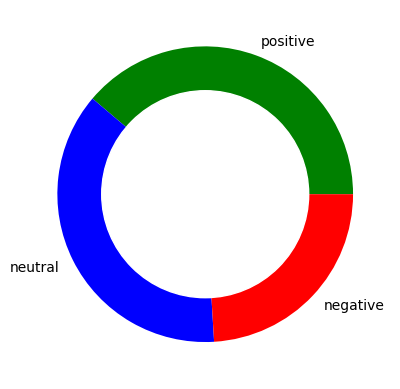

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


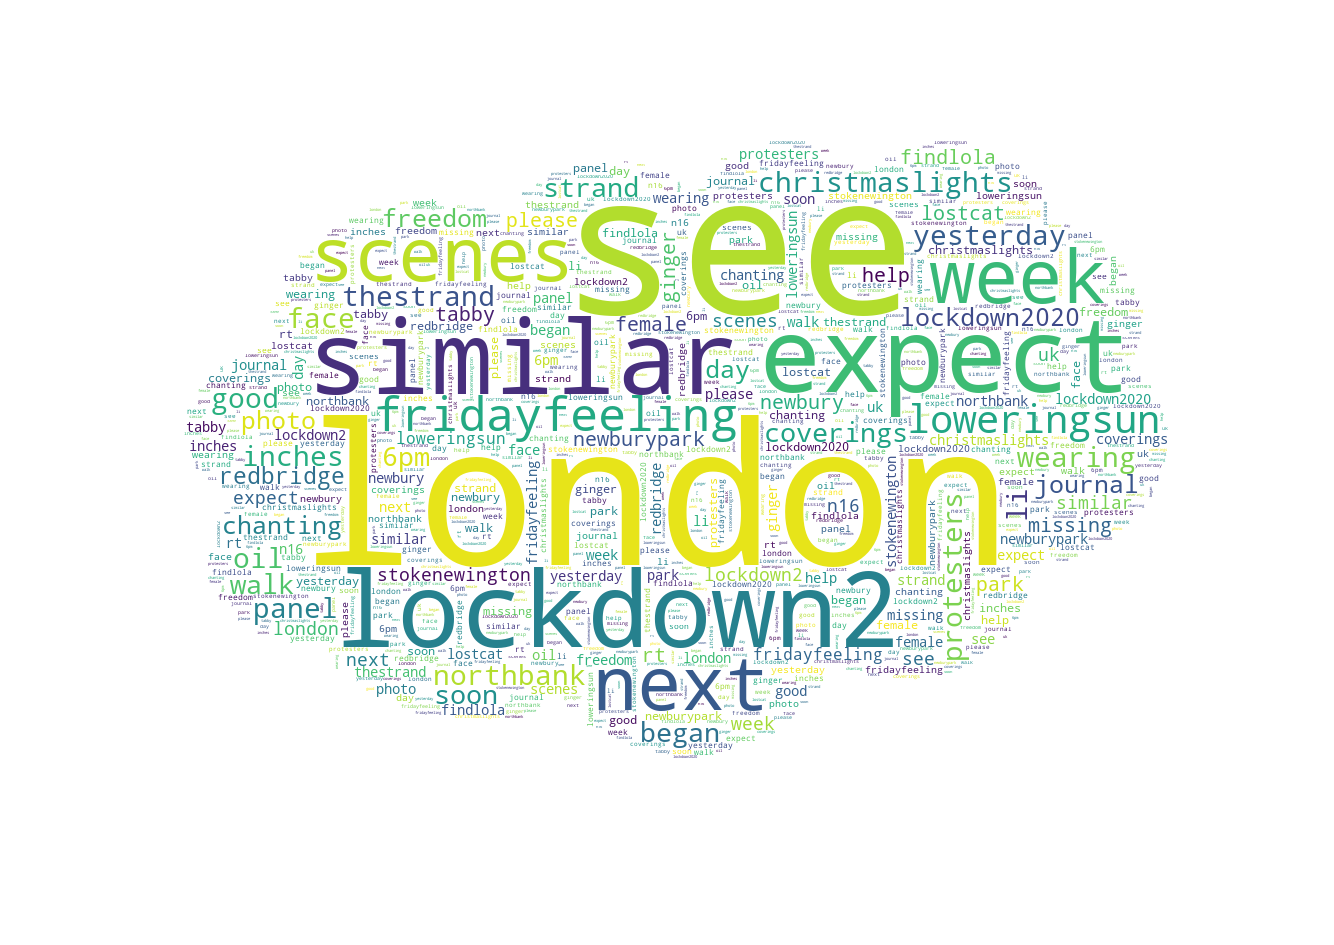

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


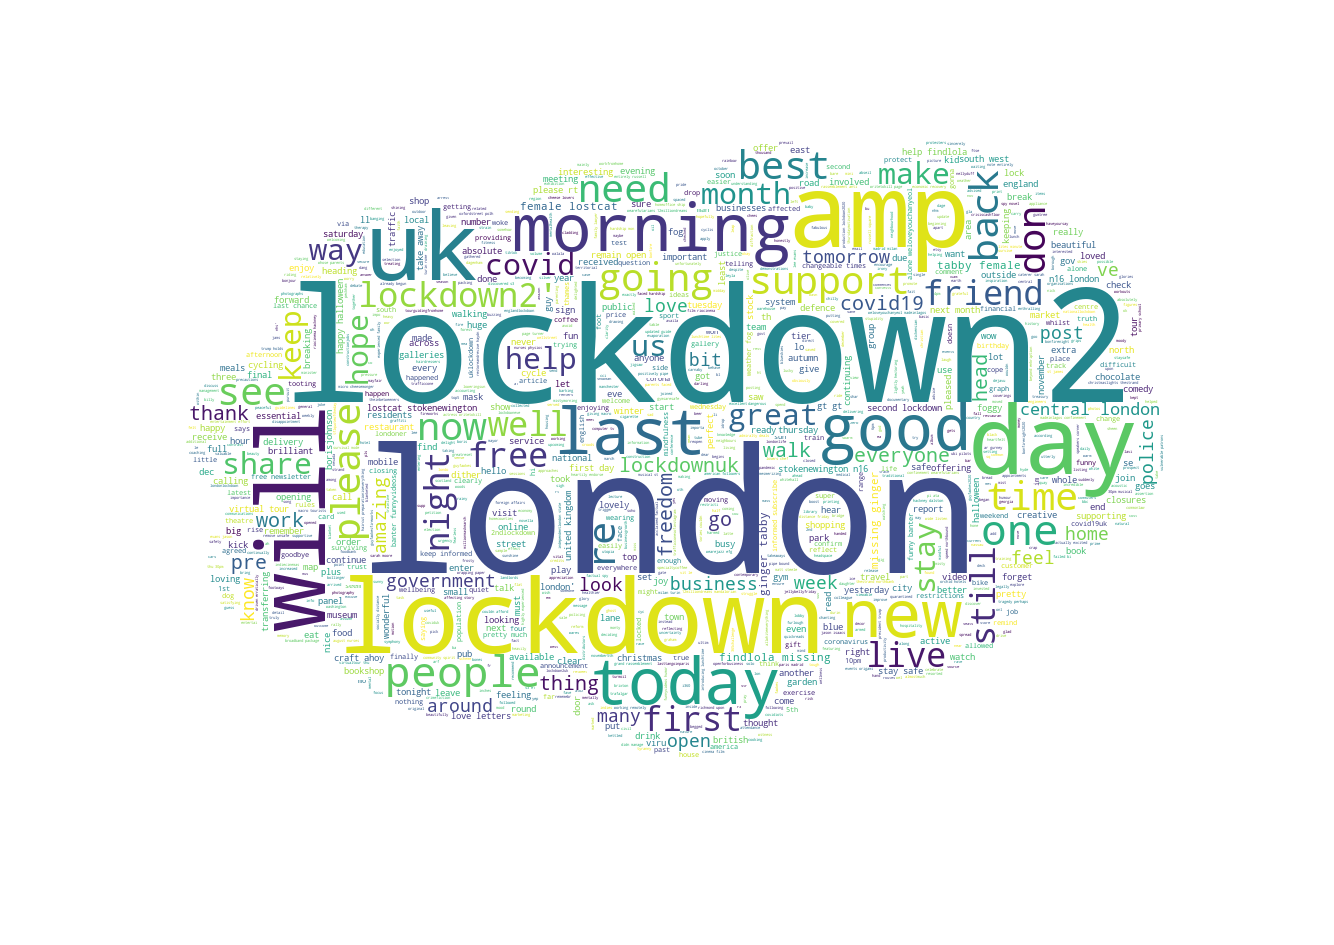

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


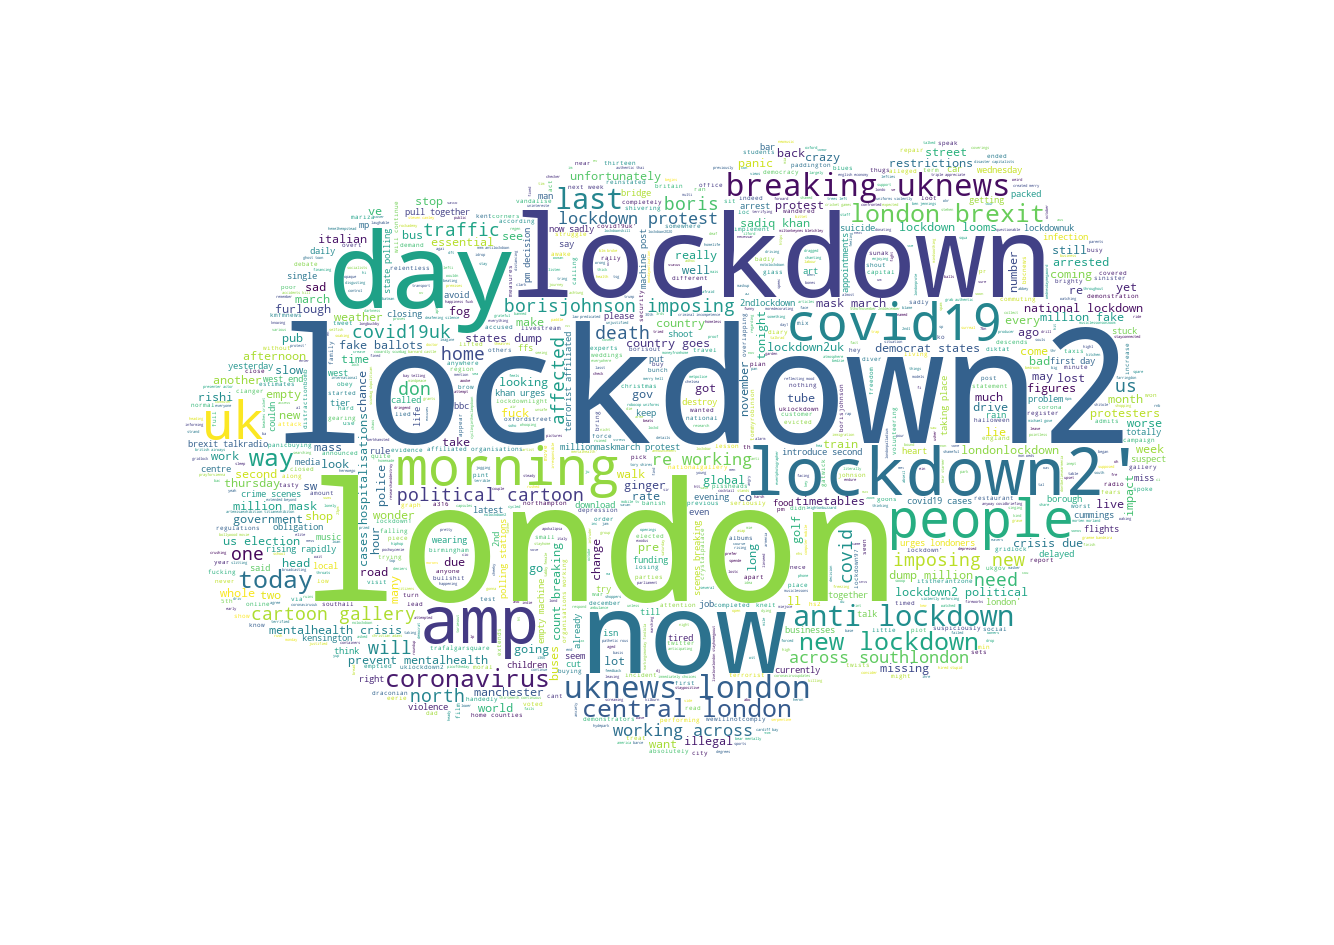

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


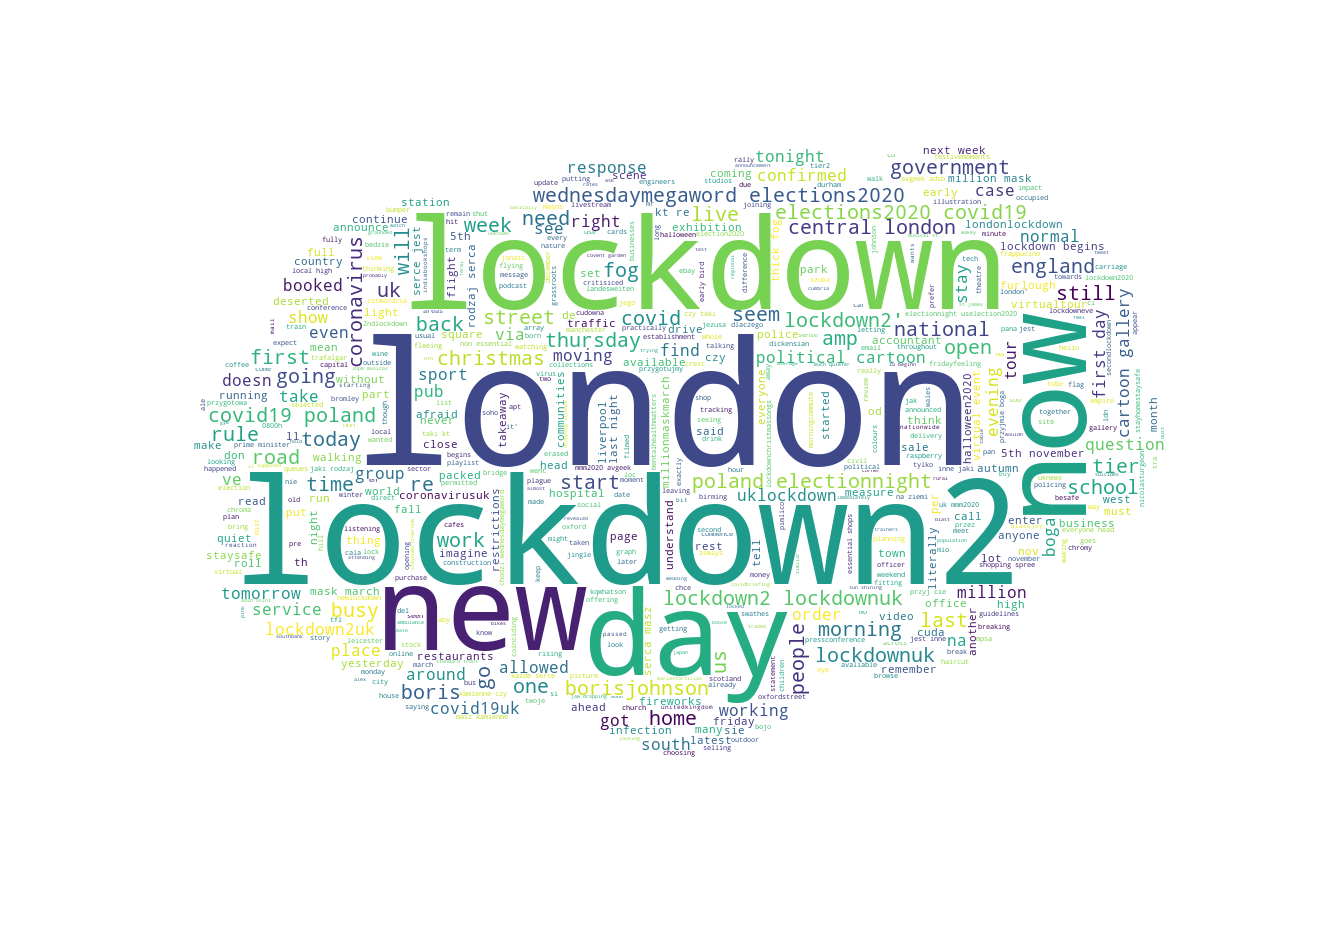

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,109.17
neutral,97.20
positive,108.87


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.48
neutral,14.70
positive,17.99


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @Petethestreet1: #loweringsun on #christmas...,loweringsun on christmaslights thestrand ...,0.700,0.600000,positive,0.000,0.847,0.153,0.4404,121,18,loweringsun on christmaslights thestrand ...,"[, loweringsun, on, christmaslights, thestrand...","[, loweringsun, christmaslights, thestrand, no...","[, loweringsun, christmaslight, thestrand, nor..."
1,"RT @LondonEconomic: Protesters, very few of wh...",protesters very few of whom were wearing fac...,-0.260,0.130000,positive,0.079,0.747,0.174,0.5106,121,20,protesters very few of whom were wearing fac...,"[, protesters, very, few, of, whom, were, wear...","[, protesters, wearing, face, coverings, began...","[, protest, wear, face, cover, began, walk, st..."
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...,photo journal day 01 lockdown2 lockdown20...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000,97,11,photo journal day lockdown lockdown red...,"[photo, journal, day, lockdown, lockdown, redb...","[photo, journal, day, lockdown, lockdown, redb...","[photo, journal, day, lockdown, lockdown, redb..."
4,God love 'em - @SlowRichies opened the doors o...,god love em opened the doors of their res...,0.375,0.466667,positive,0.000,0.730,0.270,0.7430,107,19,god love em opened the doors of their res...,"[god, love, em, opened, the, doors, of, their,...","[god, love, em, opened, doors, restaurant, pec...","[god, love, em, open, door, restaur, peckham, ..."
5,So might wear my #addidas #prideshorts for #lo...,so might wear my addidas prideshorts for lo...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000,113,12,so might wear my addidas prideshorts for lo...,"[so, might, wear, my, addidas, prideshorts, fo...","[might, wear, addidas, prideshorts, lockdown, ...","[might, wear, addida, prideshort, lockdown, ha..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1281 Number of reviews has 2966 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aba,abbey,abc,abi,abo,abseil,absolut,ac,acab,...,zatwardzia,zdo,ze,zero,ziemi,znadziesz,zo,zoo,zoom,zu
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lockdown,976
london,793
day,110
covid,106
amp,82
uk,70
go,67
new,67
last,61
morn,60


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('london lockdown2', 81),
 ('lockdown2 london', 58),
 ('day lockdown2', 30),
 ('central london', 29),
 ('wednesdaymegaword elections2020', 27),
 ('lockdown lockdown2', 26),
 ('new lockdown', 23),
 ('lockdown2 lockdownuk', 23),
 ('elections2020 covid19', 23),
 ('gallery london', 22),
 ('covid19 poland', 21),
 ('london lockdown', 20),
 ('lockdown2 lockdown', 20),
 ('political cartoon', 18),
 ('cartoon gallery', 18),
 ('london new', 16),
 ('national lockdown', 16),
 ('uknews london', 15),
 ('lockdown london', 14),
 ('breaking uknews', 14)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('wednesdaymegaword elections2020 covid19', 23),
 ('elections2020 covid19 poland', 20),
 ('political cartoon gallery', 18),
 ('cartoon gallery london', 17),
 ('breaking uknews london', 14),
 ('covid19 poland electionnight', 12),
 ('million mask march', 11),
 ('missing ginger tabby', 11),
 ('ginger tabby female', 11),
 ('uknews london brexit', 10),
 ('lockdown lockdown2 political', 10),
 ('lockdown2 political cartoon', 10),
 ('borisjohnson imposing new', 10),
 ('imposing new lockdown', 10),
 ('new lockdown lockdown2', 10),
 ('findlola missing ginger', 9),
 ('tabby female lostcat', 9),
 ('female lostcat stokenewington', 9),
 ('lostcat stokenewington n16', 9),
 ('stokenewington n16 london', 9)]